<h1>Fast Food Product's Nutrition Values Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

Reading the data:

In [38]:
nutrition_value = pd.read_csv("Datasets\\Nutrition_Value_Dataset.csv")

Cleaning the data and preparing it for analysis:

In [39]:
#Nutritional Value Data:
#We take all the data from this dataset for further analysis
print(nutrition_value.columns)

nutrition_value.describe()

Index(['Company', 'Category', 'Product', 'Per Serve Size', 'Energy (kCal)',
       'Carbohydrates (g)', 'Protein (g)', 'Fiber (g)', 'Sugar (g)',
       'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
       'Cholesterol (mg)', 'Sodium (mg)'],
      dtype='object')


c:\Users\Asus user\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg)
count,530.000000,530.000000,530.000000,530.0000,530.000000,530.000000,530.000000,530.000000,530.000000,443.000000
mean,377.304470,39.442302,16.710340,inf,8.276226,13.228528,5.946302,0.279443,118.620434,422.431578
std,338.315722,21.196943,24.425784,NaN,12.186627,10.740934,4.844024,3.265604,502.865434,471.300077
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.750000,24.227500,5.000000,1.6900,0.000000,5.000000,2.500000,0.030000,9.462500,1.450000
50%,329.645000,38.570000,11.445000,3.0000,3.200000,12.600000,5.240000,0.110000,30.085000,220.000000
75%,451.812500,54.120000,20.005000,5.9975,9.850000,18.360000,8.095000,0.207500,77.535000,754.975000
max,2880.000000,137.800000,203.000000,inf,64.220000,82.600000,33.000000,75.260000,9769.700000,2399.490000


In [40]:
#From the table above we see:

#that there are some missing values on the sodium column and we replace it with 0
nutrition_value['Sodium (mg)'] = nutrition_value['Sodium (mg)'].replace(np.nan, 0)

#That Per Serve Size is missing, looking at the data, it is because there is a g at the end of some of the values
#change the datatype for the Per Serve Size colum from str to float:
nutrition_value["Per Serve Size"] = [float(re.findall(r'(\d+(?:\.\d+)?)', x)[0]) for x in nutrition_value["Per Serve Size"]]

#We need to fix the mistake in the Fiber column
nutrition_value["Fiber (g)"] = nutrition_value["Fiber (g)"].replace(np.inf, 0)

#While looking at the data we observe that the Per Serve Size column for Domino is not correct, the values are too small. 
#It will only affect the Per Serve Size distribution so we keep it

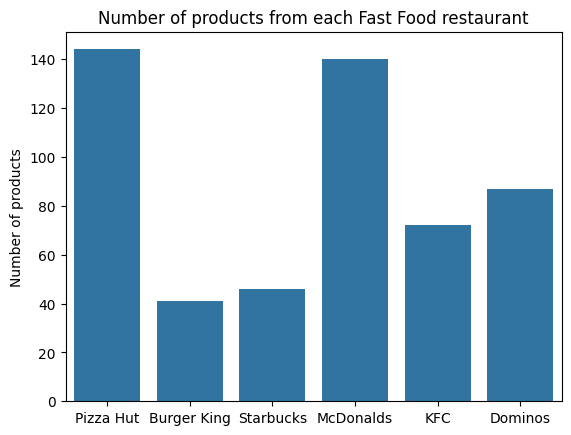

In [41]:
#Some count plots to understand the Nutrition Value dataset better:

sns.countplot(x="Company", data=nutrition_value)
plt.title("Number of products from each Fast Food restaurant")
plt.ylabel("Number of products")
plt.xlabel("")
plt.show()

Let's plot the distributions of the nutritional data get just the numerical data.

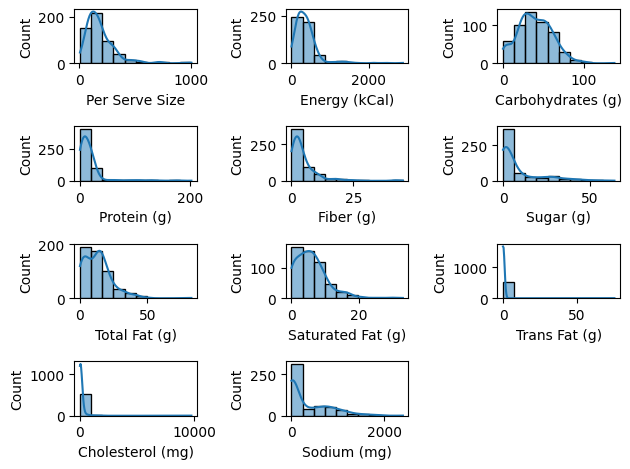

In [42]:
nutrition_columns = nutrition_value.drop(["Company", "Category", "Product"], axis=1).columns

for i, col in enumerate(nutrition_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x=nutrition_value[col], kde=True, bins=10)
    #plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

From the last plot we can see that for each column there are many ouliers, we use a boxplot without outliers to understand the general data better

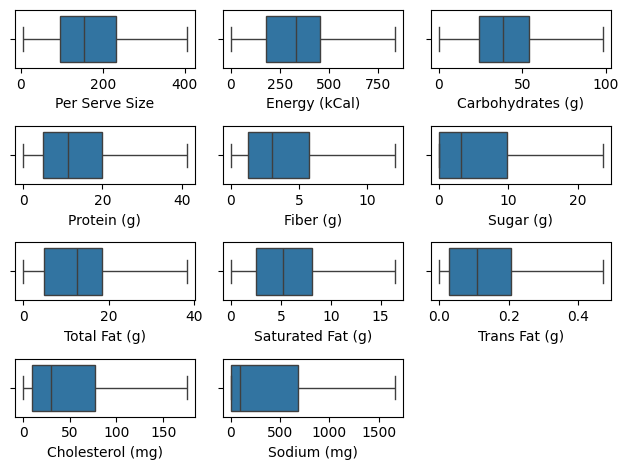

In [43]:
for i, col in enumerate(nutrition_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=nutrition_value[col], showfliers=False)
    #plt.title(f'Distribution of {col}') #clustered the plots

plt.tight_layout()
plt.show()

Now we use IQR to remove the outliers

In [44]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_m = Q1 - 1.5 * IQR
        upper_m = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_m) & (df[col] <= upper_m)]
        
    return df

In [45]:
nutrition_value_no_outliers = remove_outliers(nutrition_value, nutrition_columns)
#The number of rows dropped by almost 200 

Let's see the distribution per restaurant, compared between the two datasets:

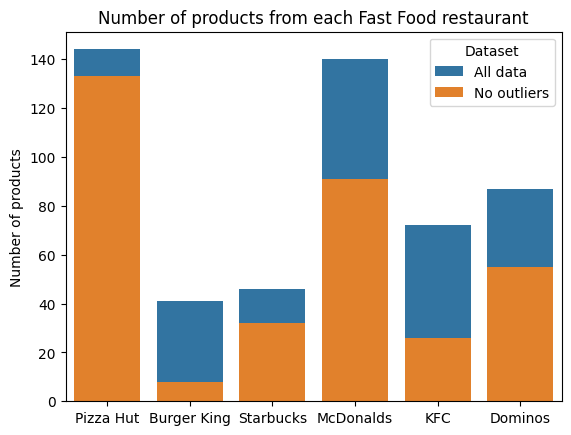

In [46]:
order = nutrition_value["Company"].unique()

sns.countplot(x="Company", data=nutrition_value, order=order, label="All data")
sns.countplot(x="Company", data=nutrition_value_no_outliers, order=order, label="No outliers")
plt.title("Number of products from each Fast Food restaurant")
plt.ylabel("Number of products")
plt.xlabel("")
plt.legend(title="Dataset")
plt.show()

From this is clear that values are deleted from each restaurant. 
The least from Pizza Hut and the most from McDonalds, KFC and Burger King, with Burger King having only 1 value.

Let's visualize the distrinutions for the dataset without outliers:

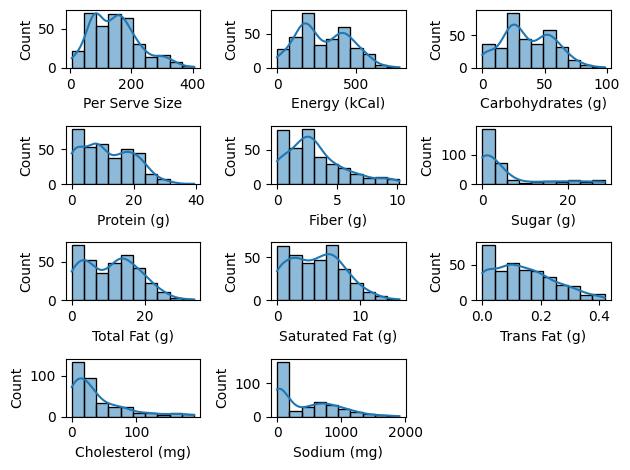

In [47]:
for i, col in enumerate(nutrition_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x=nutrition_value_no_outliers[col], kde=True, bins=10)
    #plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Now let's look at the correlation between different columns. 
Before we see that we expect for Per Serve Size and Energy(kCal) and between the Energy(kCal) column and the fat contents columns.

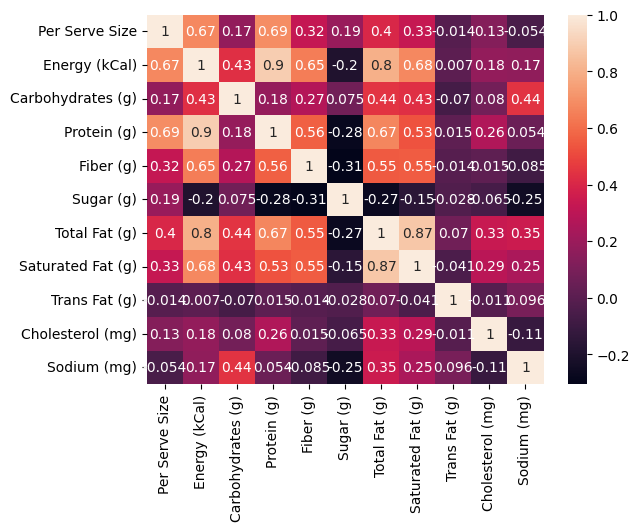

In [48]:
#For the whole dataset

sns.heatmap(nutrition_value[nutrition_columns].corr(), annot=True)
plt.show()

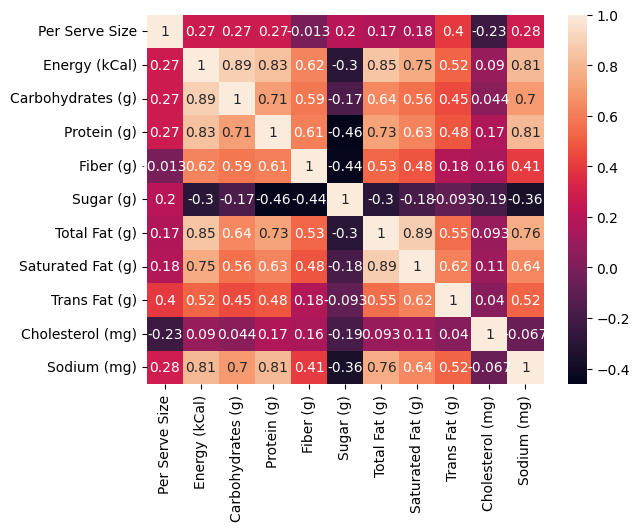

In [49]:
#For the dataset without the outliers

sns.heatmap(nutrition_value_no_outliers[nutrition_columns].corr(), annot=True)
plt.show()

The biggest difference between the two is between Energy and Carbohydrates. In the second plot the correlation being much higher. This is much closer to reality since, after fats, carbohydrates and proteins would be the highest in kCals.

We can observe that there are relationships between the data. From the heatmap it is easy to see that there is slight negative correlation between Sugar and Sodium, which makes sense, we do not expect a sweet product to have a lot of salt or a salty product to have a lot of sugar.

We can use a scatter plot to observe more in depth the following relationships:
<ul>
    <li> Between Protein and Per Serving Size</li>
    <li> Between Sugar and Energy</li>
    <li> Between Sugar and Fiber</li>
    <li> Between Protein and Energy</li>
</ul>

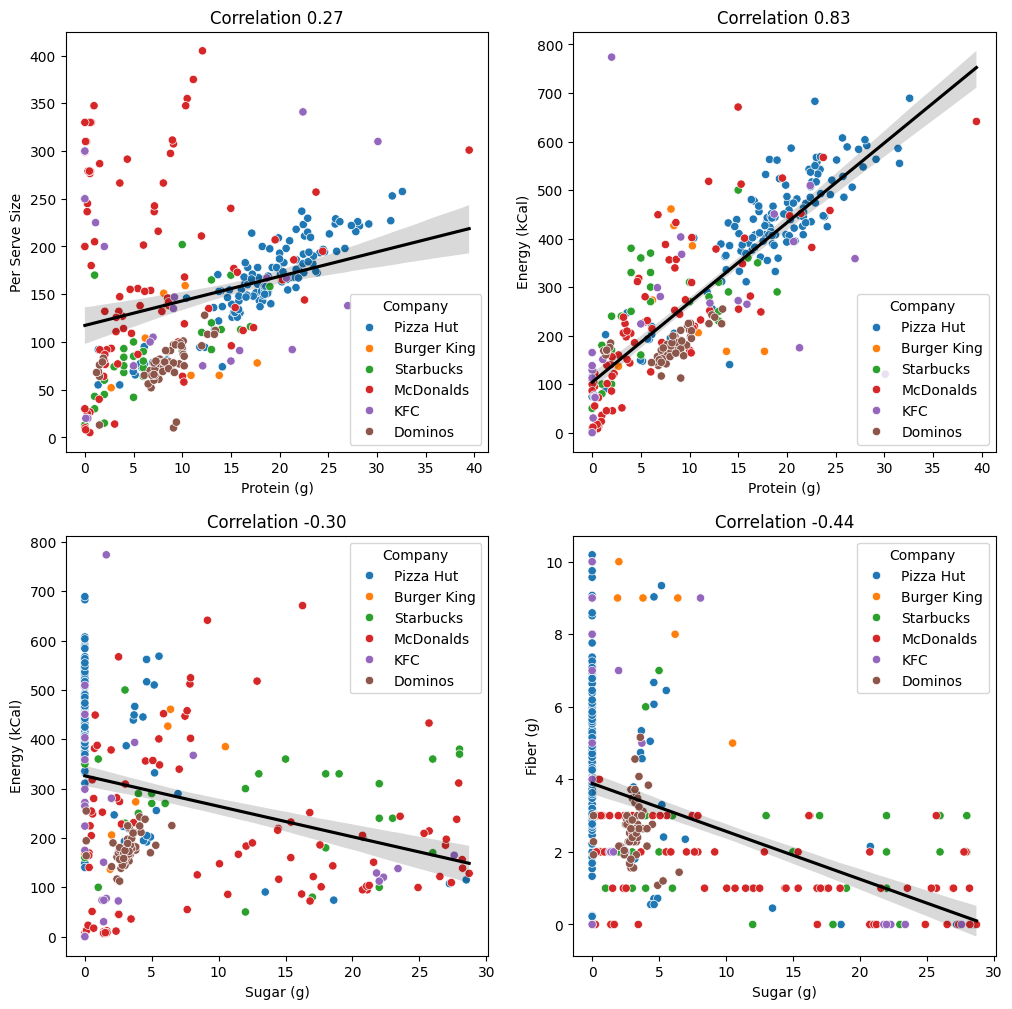

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

fig.set_size_inches(12, 12)

corr_value = np.corrcoef(nutrition_value_no_outliers["Protein (g)"], nutrition_value_no_outliers["Per Serve Size"])[0, 1]
sns.scatterplot(data=nutrition_value_no_outliers, x="Protein (g)", y="Per Serve Size", ax=ax1, hue="Company")
sns.regplot(data=nutrition_value_no_outliers, x="Protein (g)", y="Per Serve Size", scatter=False, ax=ax1, line_kws={"color": "black"})
ax1.set_title(f"Correlation {corr_value:.2f}")

corr_value = np.corrcoef(nutrition_value_no_outliers["Protein (g)"], nutrition_value_no_outliers["Energy (kCal)"])[0, 1]
sns.scatterplot(data=nutrition_value_no_outliers, x="Protein (g)", y="Energy (kCal)", ax=ax2, hue="Company")
sns.regplot(data=nutrition_value_no_outliers, x="Protein (g)", y="Energy (kCal)", scatter=False, ax=ax2, line_kws={"color": "black"})
ax2.set_title(f"Correlation {corr_value:.2f}")

corr_value = np.corrcoef(nutrition_value_no_outliers["Sugar (g)"], nutrition_value_no_outliers["Energy (kCal)"])[0, 1]
sns.scatterplot(data=nutrition_value_no_outliers, x="Sugar (g)", y="Energy (kCal)", ax=ax3, hue="Company")
sns.regplot(data=nutrition_value_no_outliers, x="Sugar (g)", y="Energy (kCal)", scatter=False, ax=ax3, line_kws={"color": "black"})
ax3.set_title(f"Correlation {corr_value:.2f}")

corr_value = np.corrcoef(nutrition_value_no_outliers["Sugar (g)"], nutrition_value_no_outliers["Fiber (g)"])[0, 1]
sns.scatterplot(data=nutrition_value_no_outliers, x="Sugar (g)", y="Fiber (g)", ax=ax4, hue="Company")
sns.regplot(data=nutrition_value_no_outliers, x="Sugar (g)", y="Fiber (g)", scatter=False, ax=ax4, line_kws={"color": "black"})
ax4.set_title(f"Correlation {corr_value:.2f}")

plt.show()

What is unexpected is that, from the heatmap we can see that there is no correlation between Energy and the Trans Fat column. 

In [51]:
#Show the value of the correlation coeficient:

corr_value = np.corrcoef(nutrition_value_no_outliers["Energy (kCal)"], nutrition_value_no_outliers["Trans Fat (g)"])[0, 1]
print(f"Correlation between Energy and Trans Fat: {corr_value:.2f}")

Correlation between Energy and Trans Fat: 0.52


On a second look, if we see the values of the Trans Fat column we can see they are very small (most of them between 0 and 0.2) because of regulations. It is normal in this case for the correlation to be non-existing.

To add more information to the data, I will create a new column called <it>nutrition_score</it> based on the EU system of grading products. This is not a 100% reliable calculation but will suffice for the purpose of this analysis.

The definition can be found here: https://en.wikipedia.org/wiki/Nutri-Score#Detailed_description

In [52]:
#Before this I need another column that holds the value: solid or beverage:

nutrition_value['type'] = np.where(
    ((nutrition_value['Category'] == 'McCAFE MENU') | 
    (nutrition_value['Per Serve Size'].isin([250.0, 330.0, 180.0, 300.0]))) &
    ~(nutrition_value['Product'].isin(["ZINGY PARCEL VEG", "Popcorn Chicken", "Spicy Paneer Wrap"])),
    'beverage',
    'solid'
)

nutrition_value_no_outliers['type'] = np.where(
    ((nutrition_value_no_outliers['Category'] == 'McCAFE MENU') | 
    (nutrition_value_no_outliers['Per Serve Size'].isin([250.0, 330.0, 180.0, 300.0]))) &
    ~(nutrition_value_no_outliers['Product'].isin(["ZINGY PARCEL VEG", "Popcorn Chicken", "Spicy Paneer Wrap"])),
    'beverage',
    'solid'
)

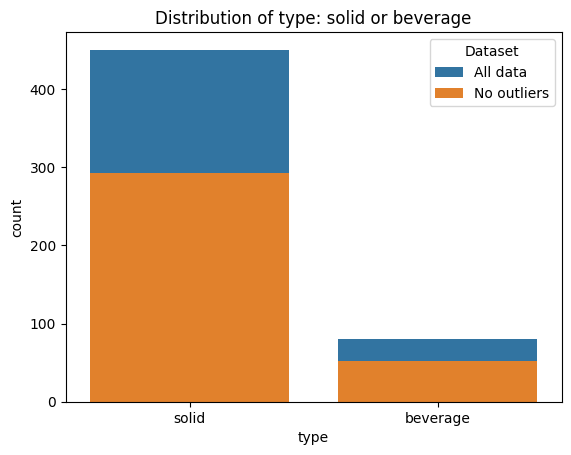

In [53]:
sns.countplot(data=nutrition_value, x='type', label="All data")
sns.countplot(data=nutrition_value_no_outliers, x='type', label="No outliers")
plt.title("Distribution of type: solid or beverage")
plt.legend(title="Dataset")
plt.show()

From this we can see that most of the outliers were solid food.

In [55]:
#needs this library: 
from pyNutriScore import NutriScore 

def nutrition_score_func(df):
    nutrition_score = []
    nutrition_score_letter = []

    for i, prod in df.iterrows():
        
        score = NutriScore().calculate(
        {
            'energy': prod['Energy (kCal)'],
            'fibers': prod['Fiber (g)'],
            'fruit_percentage': 0, #this is not 100% acuurate since some products do have fruit in them but the quantity is unknown
            'proteins': prod['Protein (g)'],
            'saturated_fats': prod['Saturated Fat (g)'],
            'sodium': prod['Sodium (mg)'],
            'sugar': prod['Sugar (g)'],
        },
        prod['type'] 
        )
        
        score_letter = NutriScore().calculate_class(
        {
            'energy': prod['Energy (kCal)'],
            'fibers': prod['Fiber (g)'],
            'fruit_percentage': 0,
            'proteins': prod['Protein (g)'],
            'saturated_fats': prod['Saturated Fat (g)'],
            'sodium': prod['Sodium (mg)'],
            'sugar': prod['Sugar (g)'],
        },
        prod['type'] 
        )
        
        nutrition_score.append(score)
        nutrition_score_letter.append(score_letter)
        
    return nutrition_score, nutrition_score_letter

In [56]:
nutrition_value['nutrition_score'], nutrition_value['nutrition_score_letter'] = nutrition_score_func(nutrition_value)
nutrition_value['nutrition_score_letter'] = nutrition_value['nutrition_score_letter'].replace('@', 'B')

nutrition_value_no_outliers['nutrition_score'], nutrition_value_no_outliers['nutrition_score_letter'] = nutrition_score_func(nutrition_value_no_outliers)
nutrition_value_no_outliers['nutrition_score_letter'] = nutrition_value_no_outliers['nutrition_score_letter'].replace('@', 'B')

For additional info: the scores are ranked from A to E, with A being the best and E the worst.

[]

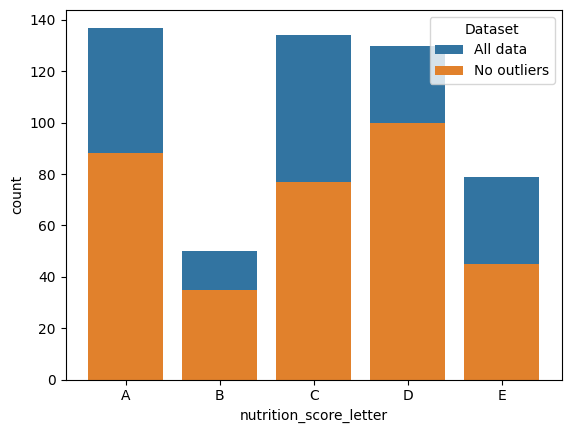

In [58]:
#Show the distribution of the scores:

#dfc = pd.concat([nutrition_value["nutrition_score_letter"], nutrition_value_no_outliers["nutrition_score_letter"]])

#sns.countplot
sns.countplot(data=nutrition_value, x="nutrition_score_letter", order=['A', 'B', 'C', 'D', 'E'], label="All data")
sns.countplot(data=nutrition_value_no_outliers, x="nutrition_score_letter", order=['A', 'B', 'C', 'D', 'E'], label="No outliers")
plt.legend(title="Dataset")
plt.plot()

Fast Food products are generaly viewed as unhealthy, but from the above plot we can see that there is a good amount of products in the A and B category, but much more in the rest of the labels. We will now take a closer look at those. 

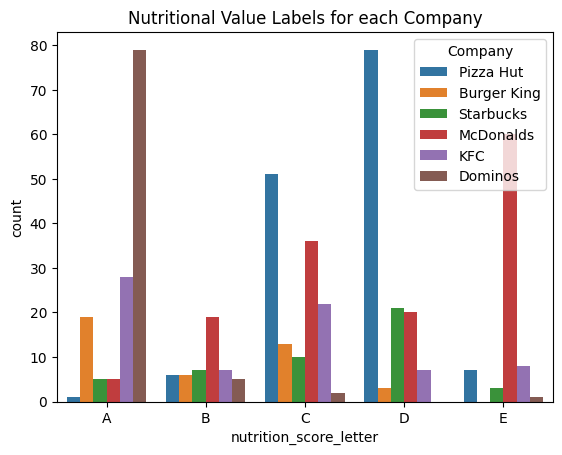

In [60]:
#We use all of the data for this:

sns.countplot(data=nutrition_value, x="nutrition_score_letter", hue='Company', order=["A", "B", "C", "D", "E"])
plt.title("Nutritional Value Labels for each Company")
plt.show()

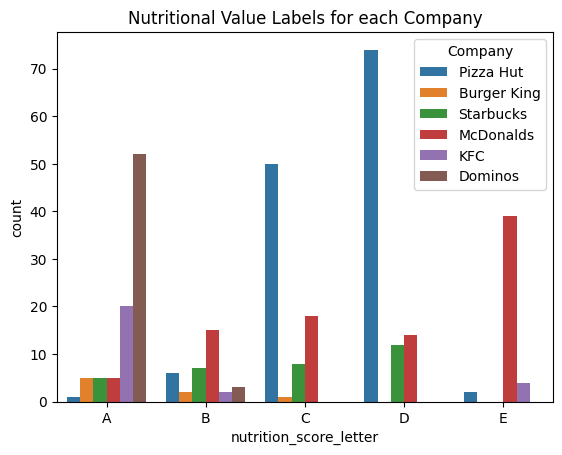

In [61]:
#And a version with the data without outliers since we will use it in the analysis:

sns.countplot(data=nutrition_value_no_outliers, x="nutrition_score_letter", hue='Company', order=["A", "B", "C", "D", "E"])
plt.title("Nutritional Value Labels for each Company")
plt.show()

From this we can conclude that, in general, Dominos tends to have products with better nutritional value, while Pizza Hut and McDonalds are the oposite. 

We can now compare Dominos and McDonalds to see why there is such a big difference between the two in terms of nutrition labels.

In [62]:
dominos_data = nutrition_value_no_outliers[nutrition_value_no_outliers["Company"]=="Dominos"]
mc_data = nutrition_value_no_outliers[nutrition_value_no_outliers["Company"] == "McDonalds"]
combined = pd.concat([dominos_data, mc_data])

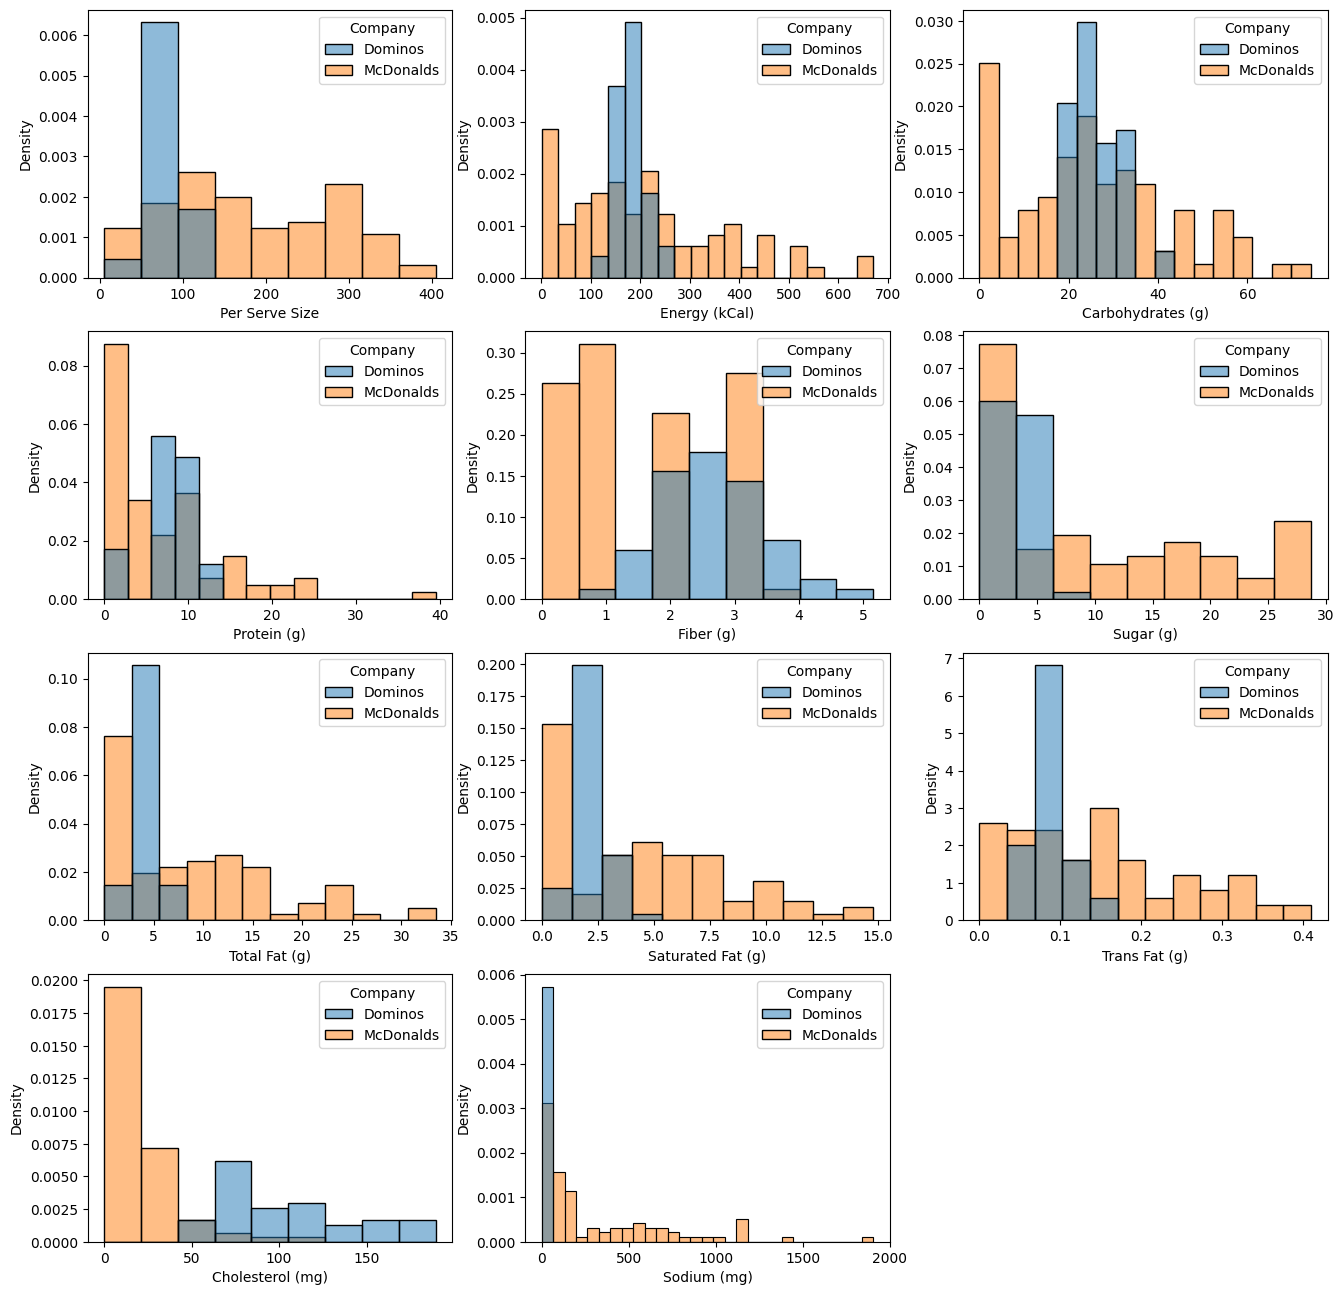

In [63]:
#This will compare distributions so we do this on the no outliers data:

nutrition_columns = list(nutrition_columns)
#nutrition_columns.append('nutrition_score') #nutrition_columns is of type Index

plt.figure(figsize=(16,16))

for i, col in enumerate(nutrition_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=combined, x=col, hue="Company", stat="density")
    
plt.show()

From this we can tell that Dominos tends to have products with more fiber, less sugar, sodium, total fats than McDonalds. All of these factors contributed in the nutrition score, making it obvious why Dominos has better scores.

<h2> Integration of a classification algorithm </h2>

Until now we visualized and made remarks on the data. Now, we want to see if we can use a ML algorithm to predict from which company a product is from. We only take the numeric data from the datatset without outliers to conduct this experiment.

In [64]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

#get the data used for the clusterization and classification, only the numerical columns:
labels = nutrition_value_no_outliers['Company']
data = nutrition_value_no_outliers[nutrition_columns].to_numpy()

#get test and train data:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.15, random_state=42)

y_test = list(y_test)
y_train = list(y_train)

#We use a classification algorithm
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
pred_labels_svc = svc.predict(X_test)

In [65]:
#see accuracy for the classification model:
from sklearn.metrics import accuracy_score

print(accuracy_score(pred_labels_svc, y_test))

0.8076923076923077


An accuracy of 0.8 for the classification model is pretty good, however, we try to improve it!

In [66]:
from sklearn.model_selection import GridSearchCV

params = {
    "C" : [0.5, 1, 1.5],
    "kernel" : ["linear", "poly", "rbf", "sigmoid"]
}

grid_search = GridSearchCV(svc, params, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best grid search score:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'C': 0.5, 'kernel': 'linear'}
Best grid search score: 0.8090005844535358


The difference is not significant. But we can say that we can predict where a product is from based on its nutritional value with a confidence of 81%.

We can try a different algorithm: Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

#We use a classification algorithm
svc = RandomForestClassifier(random_state=42)
svc.fit(X_train, y_train)
pred_labels_svc = svc.predict(X_test)

#see accuracy for this classification model:
print(accuracy_score(pred_labels_svc, y_test))

0.9615384615384616


The difference is significant this time! We can say that we can predict where a product is from based on its nutritional value with a confidence of 96%.